In [1]:
import json 
import geopandas as gpd
import pandas as pd

In [2]:
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#zuvor manueller export (automatischer aktuell nicht erwünscht) von 
#https://obs.adfc-brandenburg.de/
#https://obs.adfc-bw.de/
#https://obs.radentscheid-essen.de/
#https://portal.openbikesensor.org/
#https://obs.adfc-darmstadt.de/
#https://obs.adfc-osnabrueck.de/


files = glob.glob(r'portale\*.geojson')

len(files)

6

In [34]:
# lese daten ein

gdf =gpd.GeoDataFrame()

for f in tqdm(files):
    gdf_this = gpd.read_file(f, crs='EPSG:4326')
    portal_name=f.split('_')[-1].replace('.geojson','')
    gdf_this['portal']= portal_name

    gdf=gdf.append(gdf_this)
    
    print (portal_name)
    print (len(gdf_this))

 17%|██████████████                                                                      | 1/6 [00:00<00:03,  1.33it/s]

bbb
15523


 33%|████████████████████████████                                                        | 2/6 [00:01<00:03,  1.10it/s]

bw
20209


 50%|██████████████████████████████████████████                                          | 3/6 [00:02<00:02,  1.12it/s]

darmstadt
18420


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:03<00:01,  1.28it/s]

essen
11480


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.10it/s]

obs-portal
40722
os
2107


In [35]:
gdf['distance_overtaker']=gdf['distance_overtaker']*100
gdf['distance_stationary']=gdf['distance_stationary']*100

In [36]:
gdf

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal
0,182.0,NaN,-1,28496022.0,1.913791,4.611111,2022-05-09 15:22:33+00:00,POINT (13.42786 52.47392),bbb
1,71.0,NaN,-1,28496022.0,1.927347,1.666667,2022-05-09 15:22:48+00:00,POINT (13.42766 52.47430),bbb
2,157.0,50.0,-1,849599088.0,1.934648,4.500000,2022-05-09 15:23:26+00:00,POINT (13.42738 52.47485),bbb
3,126.0,74.0,-1,568336446.0,1.878984,4.138889,2022-05-09 15:23:33+00:00,POINT (13.42746 52.47528),bbb
4,205.0,NaN,-1,816236476.0,2.021442,4.083333,2022-05-09 15:23:44+00:00,POINT (13.42769 52.47581),bbb
...,...,...,...,...,...,...,...,...,...
2102,129.0,241.0,1,93245513.0,0.794396,3.916667,2022-11-01 05:42:58+00:00,POINT (8.00970 52.26666),os
2103,169.0,NaN,1,93245513.0,0.721962,2.361111,2022-11-01 05:43:05+00:00,POINT (8.01000 52.26678),os
2104,139.0,NaN,1,93245513.0,0.536645,2.138889,2022-11-01 05:43:08+00:00,POINT (8.01010 52.26682),os
2105,152.0,NaN,1,93245513.0,0.930771,2.750000,2022-11-01 05:43:16+00:00,POINT (8.01051 52.26698),os


<AxesSubplot:>

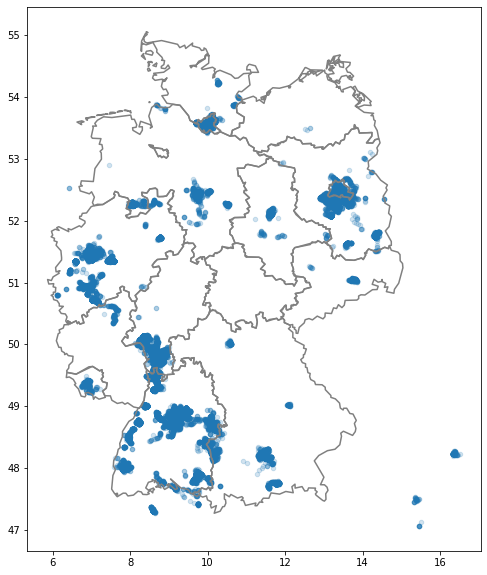

In [37]:
#übersichtskarte

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=20, alpha=0.2)

bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/4_niedrig.geo.json")
bland.boundary.plot(ax=ax, color='gray')

<AxesSubplot:xlabel='distance_stationary', ylabel='distance_overtaker'>

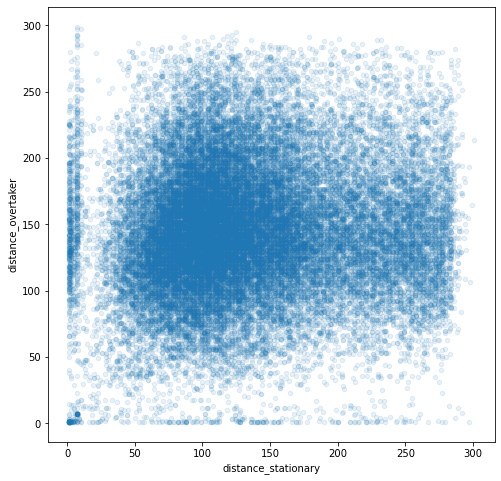

In [38]:
#left-right overview
#kaputte ultraschallsensoren werden sichtbar, häufung von Werten <10cm
gdf.plot(kind='scatter', y='distance_overtaker', x='distance_stationary', alpha=0.1, figsize=(8,8))

<AxesSubplot:xlabel='distance_stationary', ylabel='distance_overtaker'>

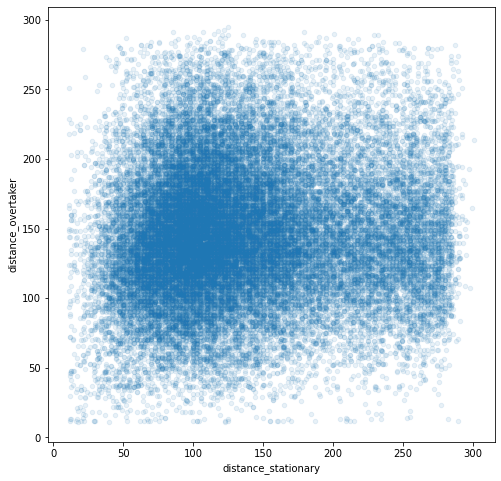

In [39]:
# wenn man alle werte unter 10cm rausfiltert sieht es plausibel aus
gdf[(gdf.distance_overtaker>10)&(gdf.distance_stationary>10)].plot(kind='scatter', y='distance_overtaker', x='distance_stationary', alpha=0.1, figsize=(8,8))

<AxesSubplot:xlabel='distance_stationary', ylabel='distance_overtaker'>

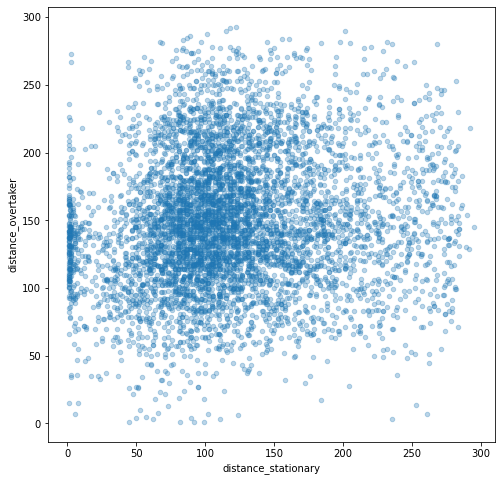

In [40]:
## data berlin-brandenburg
gdf[gdf.portal=='bbb'].plot(kind='scatter', y='distance_overtaker', x='distance_stationary', alpha=0.3, figsize=(8,8))

In [41]:
gdf_filter=gdf[(gdf['distance_stationary']>10)& (gdf['distance_overtaker']>10) ].copy()

In [42]:
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
labels = ['<20','20-40','40-60','60-80','80-100','100-120','120-140','140-160','160-180','180-200']
gdf_filter['Right_binned_label'] = pd.cut(gdf_filter['distance_stationary'], bins, labels=labels)

In [43]:
gdf_filter

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal,Right_binned_label
2,157.0,50.0,-1,849599088.0,1.934648,4.500000,2022-05-09 15:23:26+00:00,POINT (13.42738 52.47485),bbb,40-60
3,126.0,74.0,-1,568336446.0,1.878984,4.138889,2022-05-09 15:23:33+00:00,POINT (13.42746 52.47528),bbb,60-80
7,221.0,75.0,1,204483393.0,5.977279,4.777778,2022-05-06 14:33:05+00:00,POINT (14.04200 53.01348),bbb,60-80
8,194.0,104.0,1,204483393.0,6.061092,5.305556,2022-05-06 14:33:08+00:00,POINT (14.04223 53.01344),bbb,100-120
12,178.0,56.0,1,204483393.0,5.645223,6.861111,2022-05-06 14:44:06+00:00,POINT (14.07030 53.00346),bbb,40-60
...,...,...,...,...,...,...,...,...,...,...
2088,125.0,106.0,1,7760160.0,0.695963,4.805556,2022-11-01 05:34:50+00:00,POINT (7.99438 52.25893),os,100-120
2090,104.0,197.0,1,37702751.0,0.925357,4.555556,2022-11-01 05:40:56+00:00,POINT (8.00348 52.26295),os,180-200
2091,136.0,201.0,1,37702751.0,1.187806,3.277778,2022-11-01 05:41:00+00:00,POINT (8.00366 52.26307),os,NaN
2095,145.0,173.0,1,702499567.0,0.633552,0.000000,2022-11-01 05:42:20+00:00,POINT (8.00724 52.26535),os,160-180


<AxesSubplot:title={'center':'distance_overtaker'}, xlabel='[Right_binned_label]'>

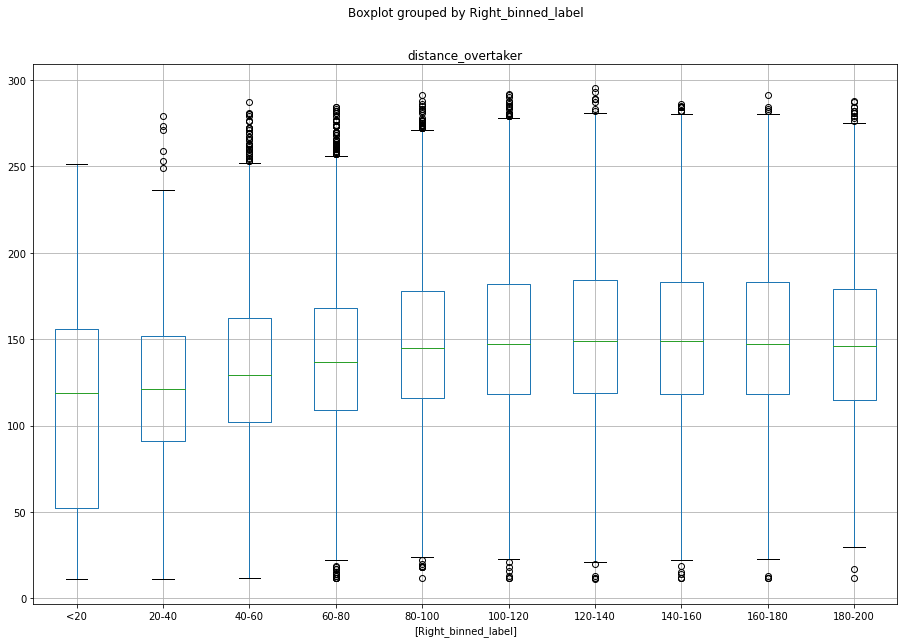

In [44]:
gdf_filter.boxplot(column=['distance_overtaker'], by=['Right_binned_label'], figsize=(15,10))

----

In [45]:
sns.set(rc={'figure.figsize':(12,8)})

Text(0.5, 1.07, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück:  (n=26625)')

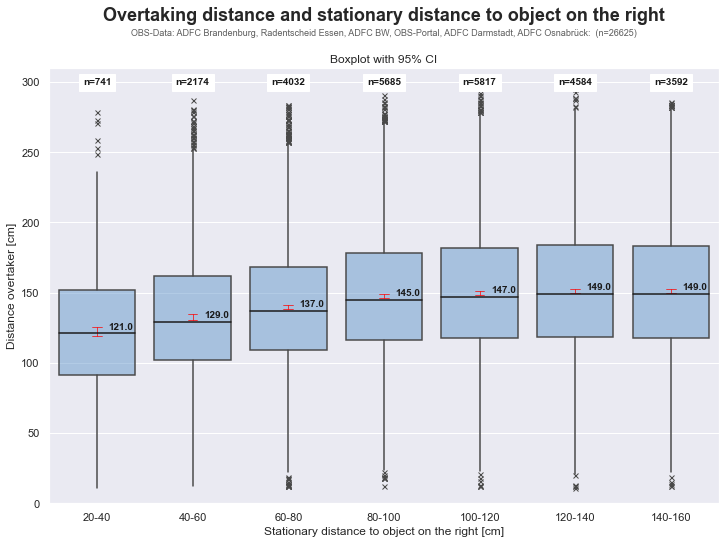

In [47]:
x_ax='Right_binned_label'

data_c_plot=gdf_filter[gdf_filter.Right_binned_label.notnull()]
data_c_plot=data_c_plot[(data_c_plot.distance_stationary>20) & (data_c_plot.distance_stationary<160)].copy()
for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()


x_ax_ordered_str=data_c_plot[x_ax].unique()

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.boxplot(
    data=data_c_plot, x=x_ax, y="distance_overtaker",
   # notch=True, 
    showcaps=False,
    flierprops={"marker": "x"},
    #order = x_ax_ordered_str,
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "k"},
    ax=ax)

### add labels to ax1
# medians
medians = data_c_plot.groupby([x_ax])['distance_overtaker'].median()
#medians=medians.reindex(x_ax_ordered_str)
vertical_offset = data_c_plot['distance_overtaker'].median() * 0.02 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick+0.25,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold')
    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
#counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick,298,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add CI
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    #order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)



#ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
#ax.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)

ax1.set(title='Boxplot with 95% CI')
ax1.set_ylabel('Distance overtaker [cm]')
ax1.set_xlabel('Stationary distance to object on the right [cm]')
#ax.set_xlabel(str(x_ax) + ' [m]')

#ax1.set(title='Boxplot')
#ax2.set(title='Confidence Interval')
#ax2.set_ylabel('')


#add overall title
ax.text(x=0.5, y=1.1, s='Overtaking distance and stationary distance to object on the right', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück:  (n=" + str(counts.sum())+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("OBS_analysis_leftright_allPortal.png", dpi=300) 

Text(0.5, 1.07, 'OBS-Data: ADFC Brandenburg:  (n=4365)')

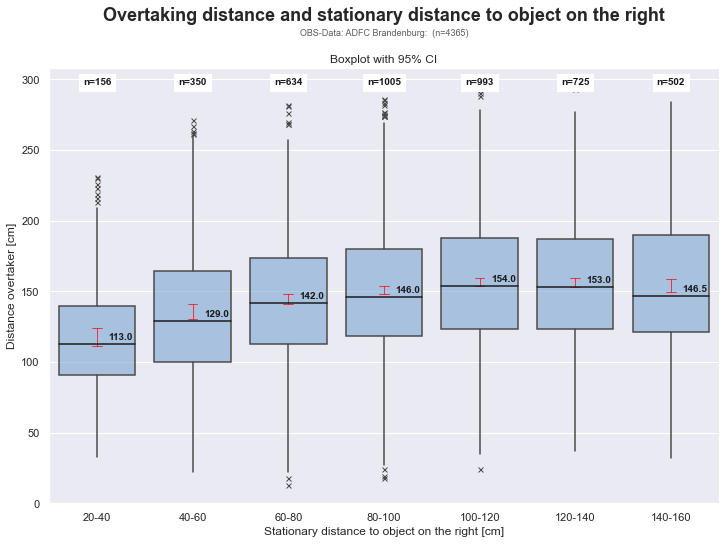

In [49]:
x_ax='Right_binned_label'

data_c_plot=gdf_filter[gdf_filter.Right_binned_label.notnull()]
data_c_plot=data_c_plot[data_c_plot.portal=='bbb']
data_c_plot=data_c_plot[(data_c_plot.distance_stationary>20) & (data_c_plot.distance_stationary<160)].copy()
for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()
    

x_ax_ordered_str=data_c_plot[x_ax].unique()


#fig, ax =plt.subplots(1,2,
#                      figsize=(15,8),
#                      sharey=True)
fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.boxplot(
    data=data_c_plot, x=x_ax, y="distance_overtaker",
   # notch=True, 
    showcaps=False,
    flierprops={"marker": "x"},
    #order = x_ax_ordered_str,
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "k"},
    ax=ax)

### add labels to ax1
# medians
medians = data_c_plot.groupby([x_ax])['distance_overtaker'].median()
#medians=medians.reindex(x_ax_ordered_str)
vertical_offset = data_c_plot['distance_overtaker'].median() * 0.02 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick+0.25,medians[xtick] + vertical_offset, round(medians[xtick],1), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold')
    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
#counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick,296,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add CI
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    #order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)



#ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
#ax.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)

ax1.set(title='Boxplot with 95% CI')
ax1.set_ylabel('Distance overtaker [cm]')
ax1.set_xlabel('Stationary distance to object on the right [cm]')
#ax.set_xlabel(str(x_ax) + ' [m]')

#ax1.set(title='Boxplot')
#ax2.set(title='Confidence Interval')
#ax2.set_ylabel('')


#add overall title
ax.text(x=0.5, y=1.1, s='Overtaking distance and stationary distance to object on the right', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg:  (n=" + str(counts.sum())+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("OBS_analysis_leftright_bbb.png", dpi=300) 